In [30]:
import scIB

In [31]:
from os.path import abspath, join
import os
from os import listdir
import scanpy as sc

In [32]:
bydataset = '../../data/integration_march_2021/input/bydataset'

In [33]:
# ad = sc.read_h5ad('../../data/integration_march_2021/input/input_all_cells.h5ad')

In [34]:
os.path.abspath('../../data/figures')

'/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/retinal_scRNAseq_integration/data/figures'

In [35]:
import numpy as np

In [36]:
for f in listdir(bydataset):
    umap_path = '../../data/figures/%s_umap.png' % f.replace('.h5ad', '')
    if os.path.exists(umap_path):
        continue
    print(f)
    ad = sc.read_h5ad(join(bydataset, f))
    print(ad.shape)
    
    print('normalization')
    sc.pp.normalize_per_cell(ad, counts_per_cell_after=1e5)
    sc.pp.log1p(ad)

    sc.tl.pca(ad)
    sc.pp.neighbors(ad)
    sc.tl.umap(ad)
    
    ad.obs['scpred_prediction'] = ad.obs['scpred_prediction'] if 'scpred_prediction' in ad.obs else np.nan
    sc.pl.umap(ad, color=['dataset', 'batch', 'scpred_prediction'], show=False)
    plt.savefig(umap_path)
    plt.close()


In [37]:
sc.set_figure_params(facecolor='white')

In [38]:
import matplotlib.pyplot as plt

In [39]:
p = '../../data/integration_march_2021/input/input_1000_cells.h5ad'

In [40]:
ad = sc.read_h5ad(p)

In [41]:
# sc.pl.pca(ad, color=['dataset', 'batch', 'scpred_prediction'])

In [42]:
# sc.pl.umap(ad_sel, color=['dataset', 'batch'])

In [44]:
ad.obs['dataset'].value_counts()

Chen_a     40000
Chen_c     20000
Roska      18210
Sanes      17753
Chen_b     15000
Hackney    11000
Wong        5000
Scheetz     4082
Hafler      3458
Name: dataset, dtype: int64

In [45]:
# ad.obs['batch'].value_counts()

In [46]:
# for k in ad.obs:
#     print(k, len(set(ad.obs[k])))

In [47]:

import pandas as pd

In [48]:
# print(ad.obs['donor'].value_counts().shape, ad.obs['batch'].value_counts().shape)
ad.obs['donor.n.batch'] = (ad.obs['donor'].astype(str) + ':' + ad.obs['batch'].astype(str))

In [49]:
print('done...')

done...


In [50]:
ad.obs['cell.type']

AAACCTGCACCCAGTG-1-0:Wong:0        Rod
AAACGGGAGCAGACTG-1-0:Wong:0        Rod
AAACGGGTCCCGGATG-1-0:Wong:0        Rod
AAAGCAATCTCGAGTA-1-0:Wong:0        Rod
AAAGTAGAGCCAGAAC-1-0:Wong:0         BC
                                  ... 
TTTGATCTCGGCTGTG-1-39:Chen_a:39    Rod
TTTGATCTCGTGCAGC-1-39:Chen_a:39    Rod
TTTGGTTAGTAGGATT-1-39:Chen_a:39    Rod
TTTGGTTGTCTGTAAC-1-39:Chen_a:39    Rod
TTTGTTGTCCTGTAAG-1-39:Chen_a:39    Rod
Name: cell.type, Length: 134503, dtype: category
Categories (11, object): ['AC', 'Astrocyte', 'BC', 'Cone', ..., 'RGC', 'RPE', 'Rod', 'unassigned']

In [51]:
print('calculating batches. This takes ~5min')
df = pd.DataFrame([[k, len(set(ad.obs[k])), scIB.me.pcr(ad, k)] for k in ['donor', 'batch', 'dataset', 'batch.merged', 'donor.n.batch', 'cell.type']],
                  columns=['k', 'n.labels', 'PCR'])

calculating batches. This takes ~5min


In [52]:
df.sort_values('n.labels')

,k,n.labels,PCR
2,dataset,9,0.461165
5,cell.type,11,0.319698
1,batch,40,0.083071
0,donor,50,0.483441
4,donor.n.batch,139,0.607816
3,batch.merged,142,0.616496


In [53]:
df['dataset'] = 'all'

In [54]:
len(ad.obs['batch'].value_counts())

40

In [55]:
len(set(ad.obs['batch'])), len(set(ad.obs['batch.merged']))

(40, 142)

In [56]:
for dataset in set(ad.obs['dataset']):
    print(dataset)
    ad_sel = ad[ad.obs['dataset'] == dataset,:]
    print(len(ad_sel.obs['batch.merged'].value_counts()), len(ad_sel.obs['batch'].value_counts()))

Chen_c
20 20
Wong
5 5
Roska
21 21
Hafler
6 6
Scheetz
6 6
Hackney
11 11
Chen_a
40 40
Sanes
18 18
Chen_b
15 15


/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [81]:
ad = ad[ad.obs['dataset'].str.contains('Chen_c'),:]
ad.shape

/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


(20000, 4063)

In [82]:
df_all = []
for dataset in set(ad.obs['dataset']):
    print(dataset)
    ad_sel = ad[ad.obs['dataset'] == dataset,:]
    df2 = pd.DataFrame([[k, len(set(ad_sel.obs[k])), scIB.me.pcr(ad_sel, k)]
                        for k in ['donor', 'batch', 'dataset', 'batch.merged', 'donor.n.batch', 'cell.type']], columns=['k', 'n.labels', 'PCR'])
    df2['dataset'] = dataset
    df_all.append(df2)

Chen_c


In [83]:
res = pd.concat([df, pd.concat(df_all)])

In [84]:
# remove this label (mistake and it has to be checked)
res = res[~res['k'].str.contains('sample.40')]

In [85]:
import seaborn as sns
from matplotlib import rcParams

In [86]:
rcParams['figure.figsize'] = 10, 5

In [87]:
len(set(ad.obs['batch'])), len(set(ad.obs['batch.merged'])), len(set(ad.obs['donor']))

(20, 20, 20)

In [88]:
res['dataset'] = np.where(pd.isnull(res['dataset']), 'all', res['dataset'])

In [89]:
# resb
d = {'batch': 'sample.40', 'batch.merged': 'sample.142', 'dataset': 'dataset.9'}
res['k'] = np.where(~pd.isnull(res['k'].map(d)), res['k'].map(d), res['k'])
hm = res.pivot('dataset', 'k', 'n.labels').T
order = hm.columns
hm

dataset,Chen_c,all
k,,
cell.type,11,11
dataset.9,1,9
donor,20,50
donor.n.batch,20,139
sample.142,20,142
sample.40,20,40


In [90]:
order = res[res['k'] == 'donor'].sort_values('PCR').dataset.values
hm[order]

dataset,Chen_c,all
k,,
cell.type,11,11
dataset.9,1,9
donor,20,50
donor.n.batch,20,139
sample.142,20,142
sample.40,20,40


In [91]:
order

array(['Chen_c', 'all'], dtype=object)

In [92]:
sorted(list(set(res['k'])))

['cell.type', 'dataset.9', 'donor', 'donor.n.batch', 'sample.142', 'sample.40']

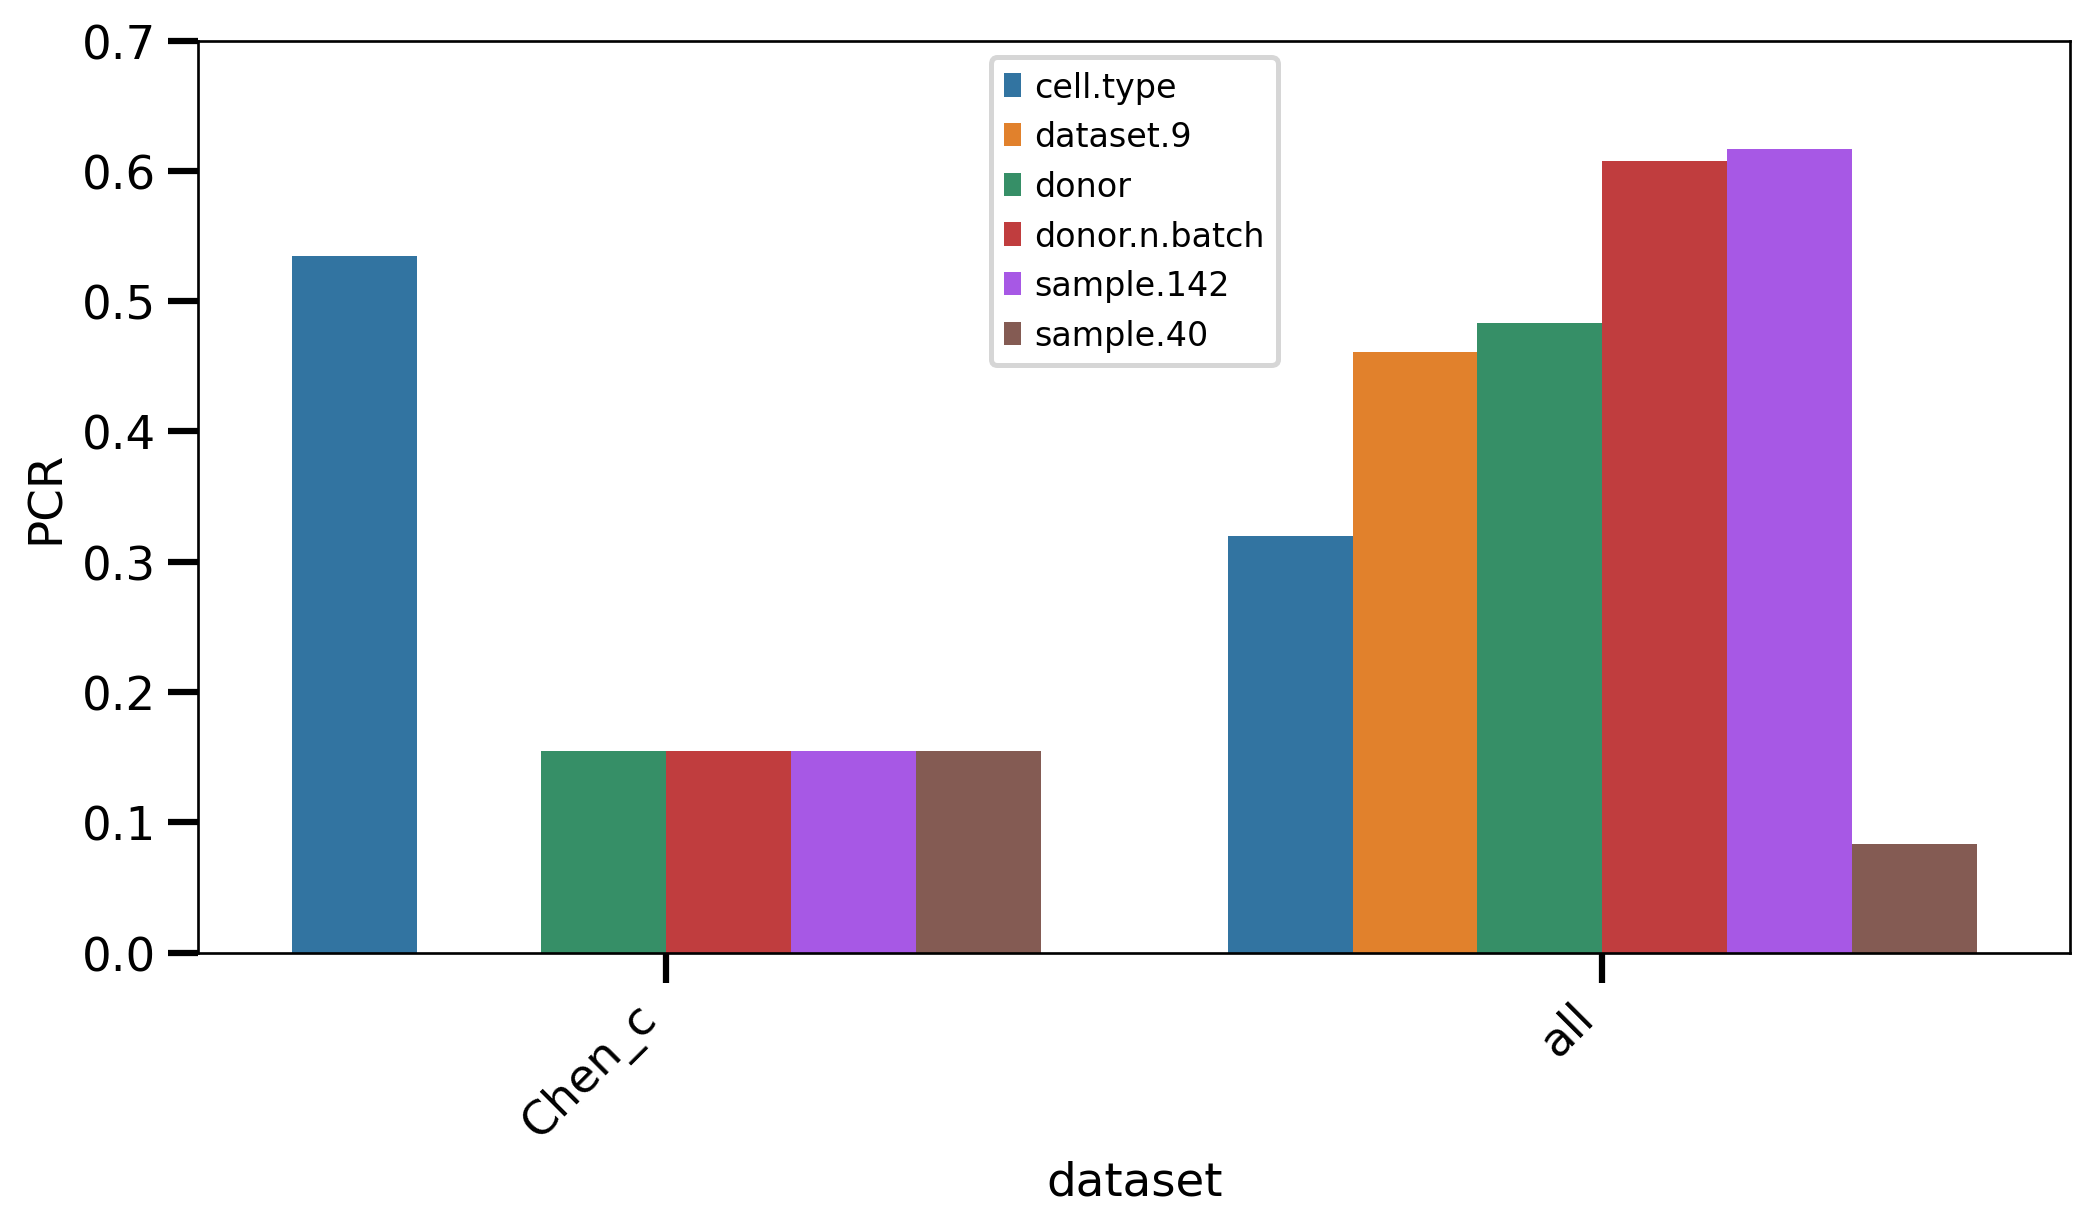

In [93]:
rcParams['figure.dpi'] = 120
sns.barplot(data=res, x='dataset', y='PCR', hue='k', zorder=0, order=order, hue_order=sorted(list(set(res['k']))))

plt.xticks(rotation=45, ha='right')
plt.legend(fontsize=10)
plt.grid(False)
plt.ylim([0, 0.7]);

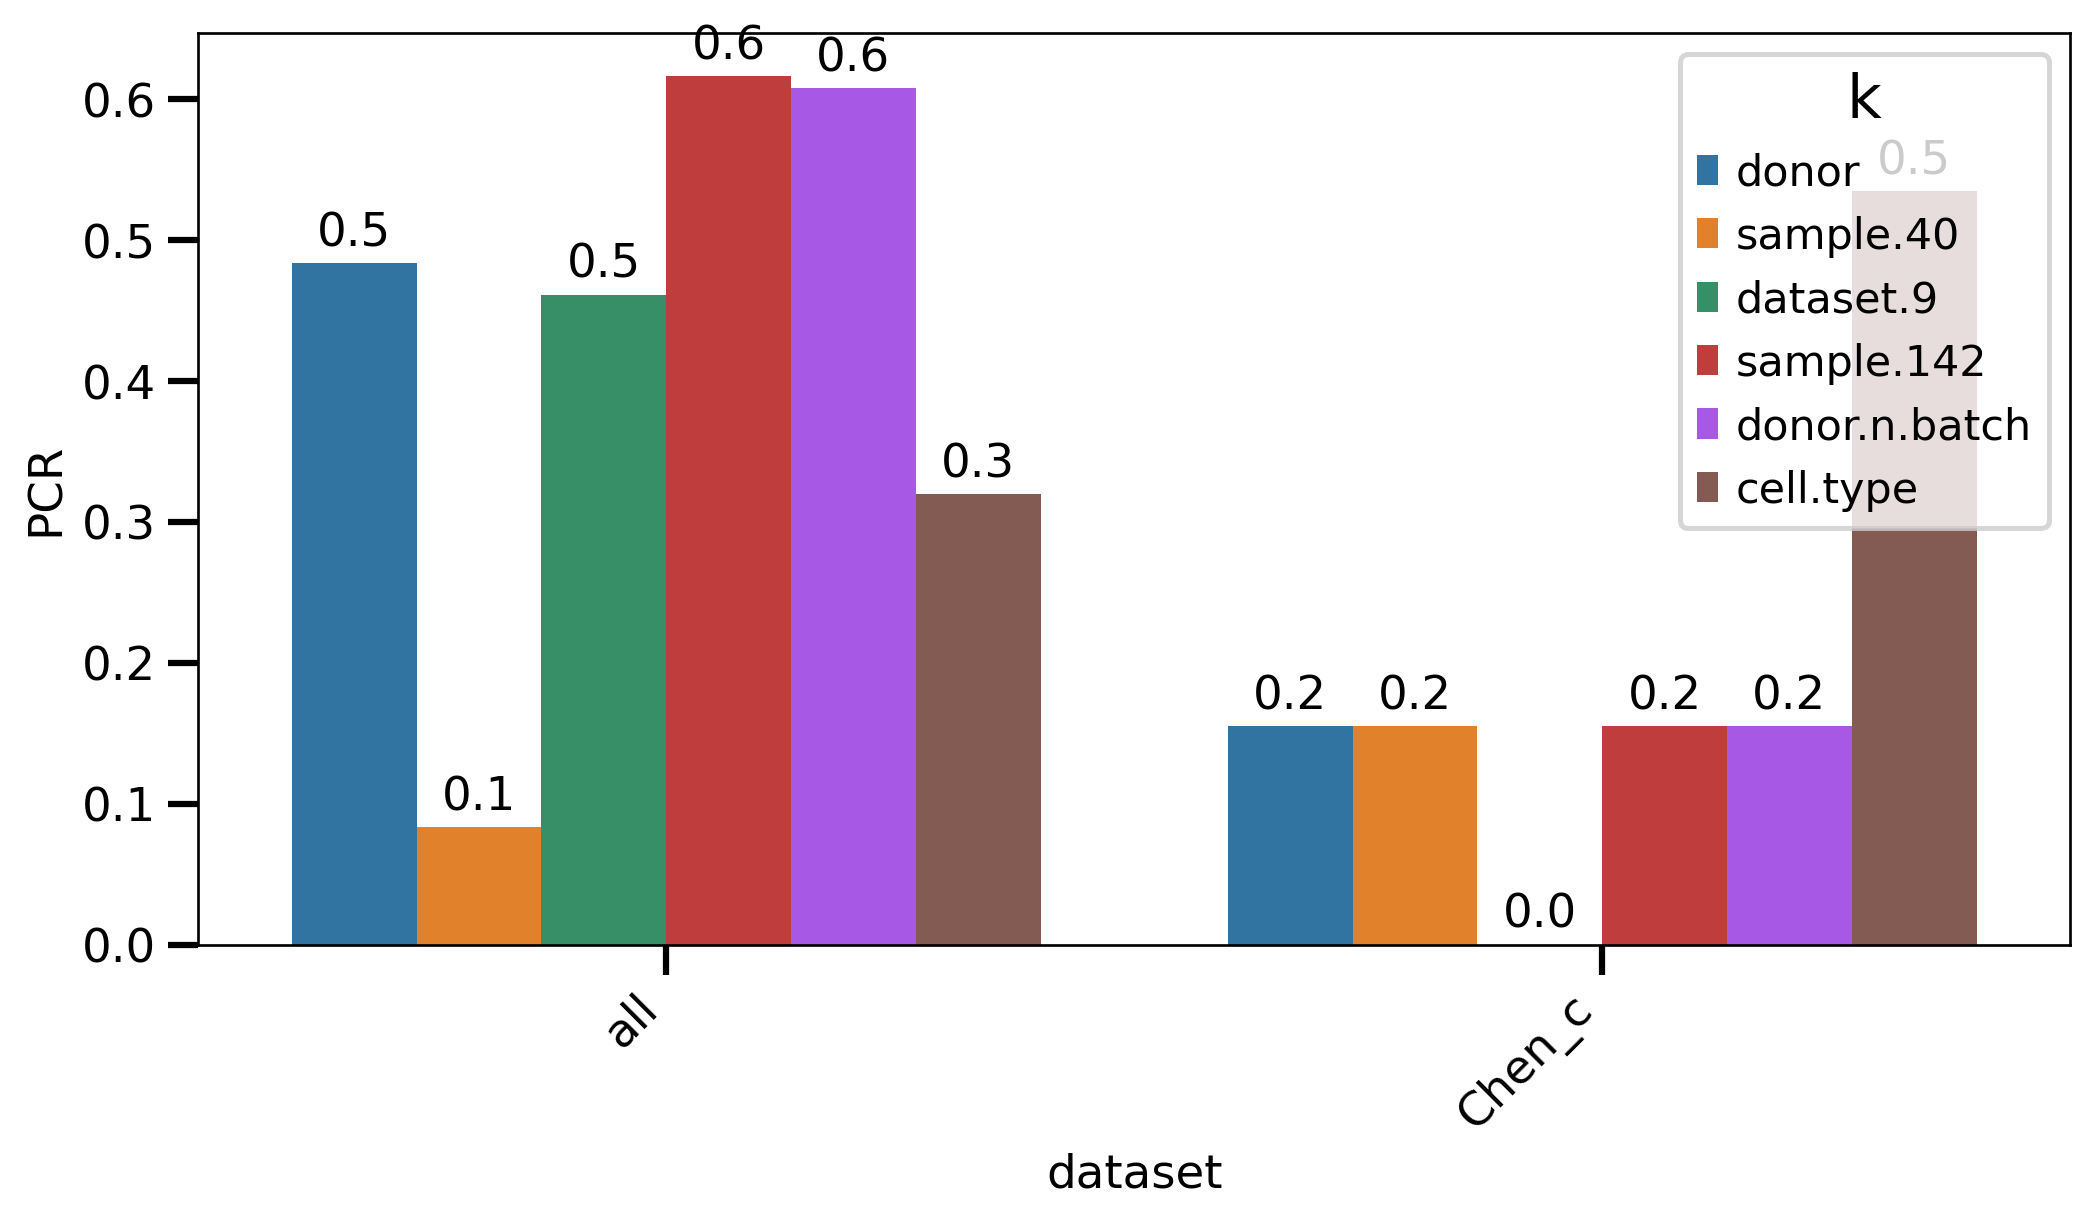

In [94]:
splot = sns.barplot(data=res, x='dataset', y='PCR', hue='k', zorder=0)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=45, ha='right')
plt.grid(False)

In [95]:
sc.pp.neighbors(ad)

/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../../../../home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.

In [96]:
sc.tl.umap(ad)

In [ ]:
sc.setting

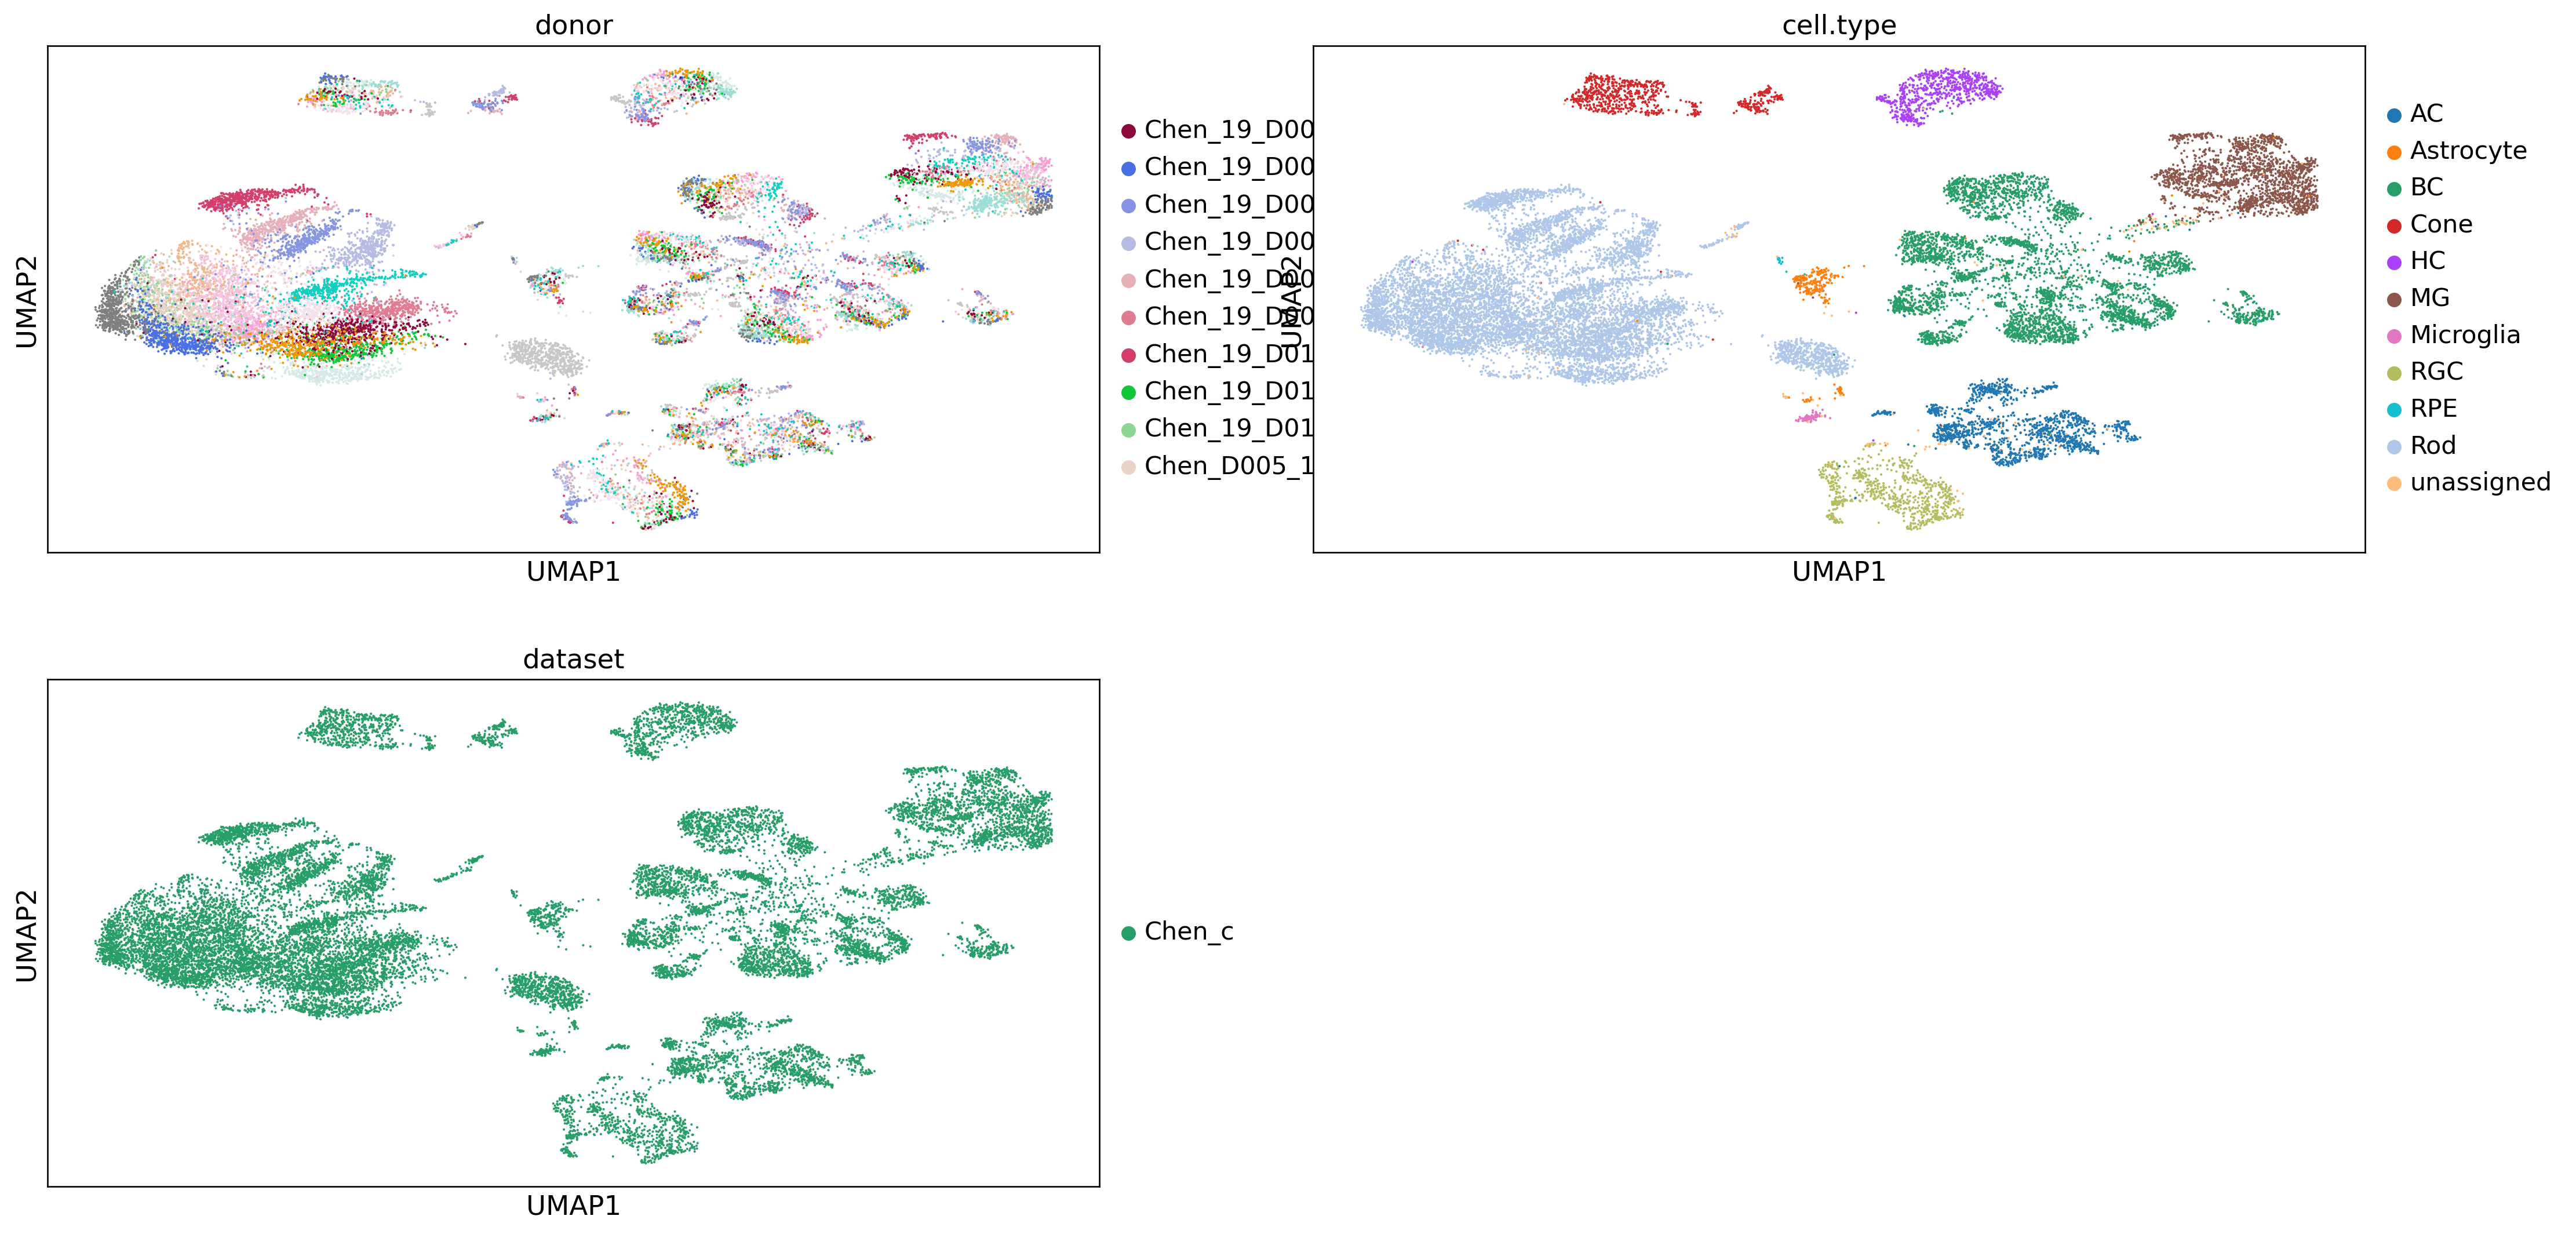

In [98]:
sc.pl.umap(ad, color=['donor', 'cell.type', 'dataset'], ncols=2)